In [1]:
# Loading the required packages and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

In [2]:
#df = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [3]:
df=pd.read_csv('A.csv')

In [4]:
from sklearn.model_selection import train_test_split

predictors = df.drop("SalePrice",axis=1)
target = df["SalePrice"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## 2. Exploring the data

Refered to Krish Naik's video. The link is below   

https://www.youtube.com/watch?v=ioN1jcWxbv8&t=1262s



In [5]:
df.head()

,MS Zoning,Lot Area,Street,Lot Config,Bldg Type,House Style,Overall Cond,Year Built,Roof Style,Exterior 1st,...,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Cars,Garage Area,Pool Area,Pool QC,Sale Condition,SalePrice
0,RL,31770,Pave,Corner,1Fam,1Story,5,1960,Hip,BrkFace,...,3,1,TA,Typ,2.0,528.0,0,NaN,Normal,215000
1,RH,11622,Pave,Inside,1Fam,1Story,6,1961,Gable,VinylSd,...,2,1,TA,Typ,1.0,730.0,0,NaN,Normal,105000
2,RL,14267,Pave,Corner,1Fam,1Story,6,1958,Hip,Wd Sdng,...,3,1,Gd,Typ,1.0,312.0,0,NaN,Normal,172000
3,RL,11160,Pave,Corner,1Fam,1Story,5,1968,Hip,BrkFace,...,3,1,Ex,Typ,2.0,522.0,0,NaN,Normal,244000
4,RL,13830,Pave,Inside,1Fam,2Story,5,1997,Gable,VinylSd,...,3,1,TA,Typ,2.0,482.0,0,NaN,Normal,189900


Here we check the percentage of nan values present in each feature

In [6]:
feautres_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [7]:
feautres_na

['Pool QC']

In [8]:
for features in feautres_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

Pool QC 0.9956 %


We might want to remove columns with more than 50% missing values

In [9]:
more_than_50_percent_misssing_value_features = [features for features in feautres_na if (np.round(df[features].isnull().mean(),4)) > 0.5]


In [10]:
more_than_50_percent_misssing_value_features

['Pool QC']

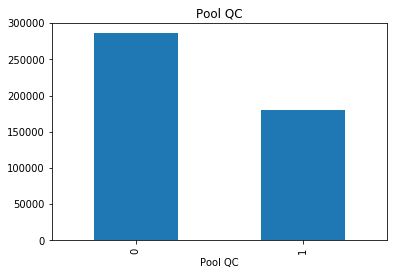

In [11]:

for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

We observe that the data with the missing values and the dependent variable(Sales Price) is clearly visible.So We need to replace these missing values with meaningful data.   
Now we see the which features are having numerical data.   


In [12]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Lot Area',
 'Overall Cond',
 'Year Built',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Cars',
 'Garage Area',
 'Pool Area',
 'SalePrice']

In [13]:
df[numerical_features].head()

,Lot Area,Overall Cond,Year Built,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Garage Cars,Garage Area,Pool Area,SalePrice
0,31770,5,1960,1,3,1,2.0,528.0,0,215000
1,11622,6,1961,1,2,1,1.0,730.0,0,105000
2,14267,6,1958,1,3,1,1.0,312.0,0,172000
3,11160,5,1968,2,3,1,2.0,522.0,0,244000
4,13830,5,1997,2,3,1,2.0,482.0,0,189900


So we see that there are 38 features which are numerical.   
Also we see that, some columns are having year.So we try to find out the fields which contain year information.As these will be used to calculate the age of house.

In [14]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['Year Built']

Observing the SalesPrice as per the year sold

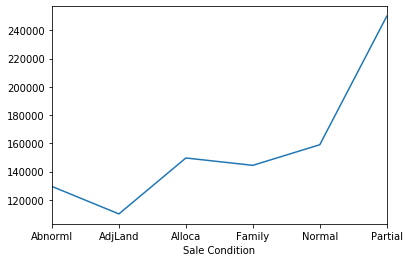

In [15]:
df.groupby('Sale Condition')['SalePrice'].median().plot()

We observe that the price is decresing as the years are more recent, which is very strange, so we look further

In [16]:
for feature in year_features:
    if feature != "Yr Sold":
        data = df.copy()
        data[feature] = data['Yr Sold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

KeyError: 'Yr Sold'

For each case we see that the house price is more for the house which is recently built and sold, which is reasonable 

Going on further, for numerical variables we observe that it can be of 2 types. Discrete and continous. If we take a limit of 25 distinct values as discreate variables, let us try to find the discrete variables.

In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features


['Overall Cond',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Cars',
 'Pool Area']

In [18]:
df[discrete_features].head()

,Overall Cond,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Garage Cars,Pool Area
0,5,1,3,1,2.0,0
1,6,1,2,1,1.0,0
2,6,1,3,1,1.0,0
3,5,2,3,1,2.0,0
4,5,2,3,1,2.0,0


We see that ther are 17 discrete variables

We try to explore its relation with SalePrice

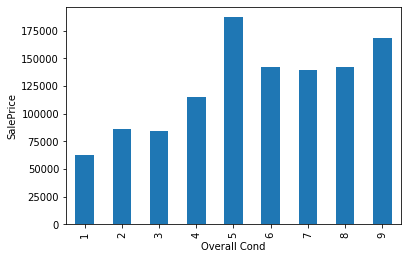

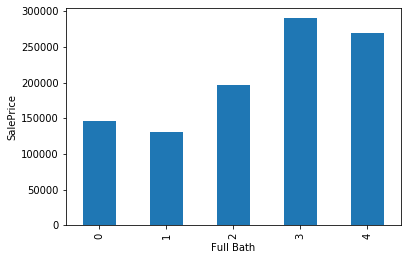

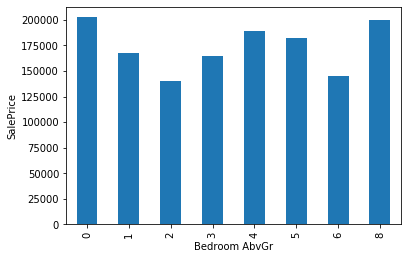

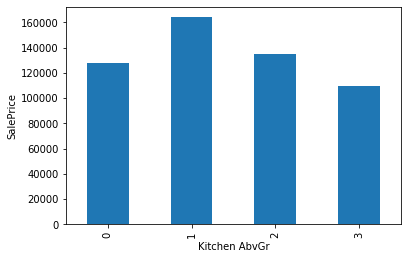

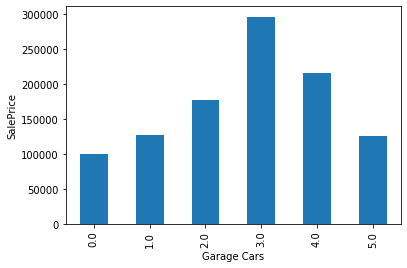

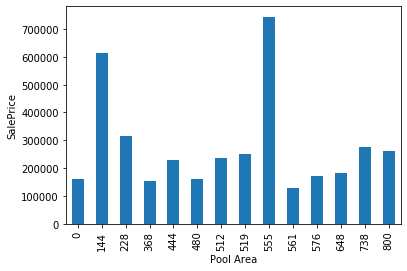

In [19]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

We observe that there is some relationship between these discrete variables and SalePrice

Now we see the continous numerical features

In [20]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features


['Lot Area', 'Garage Area', 'SalePrice']

Using histograms for continous numerical variable to study the pattern

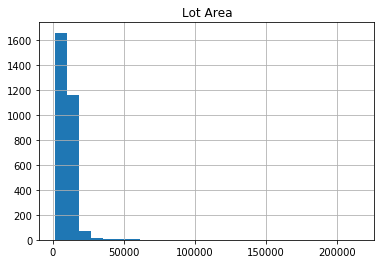

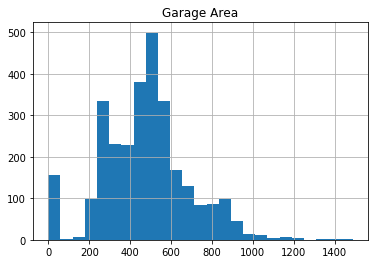

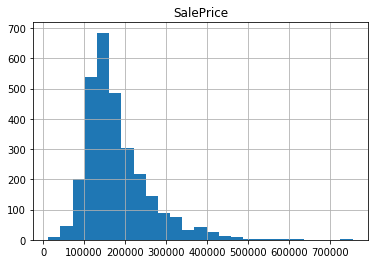

In [21]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()
    

We observe that some of the distributions are gaussian, but others are skewed

We try to normalise the skewed ones with lograthmic transformation

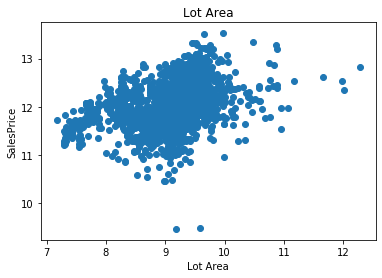

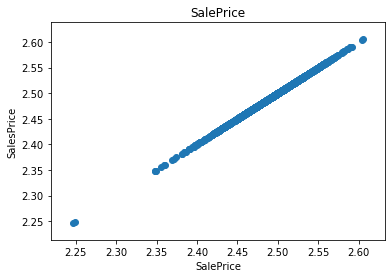

In [22]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

We see that there is a positive correlation betweent he features and the SalePrice

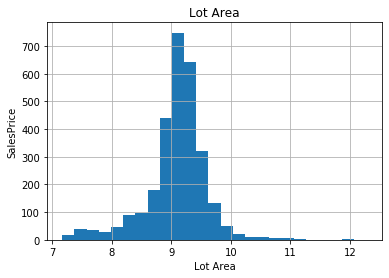

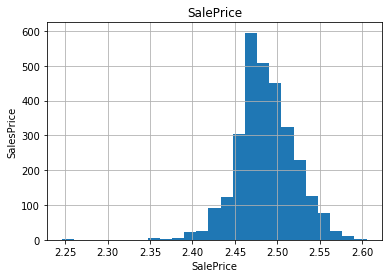

In [23]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Now we search for outliers

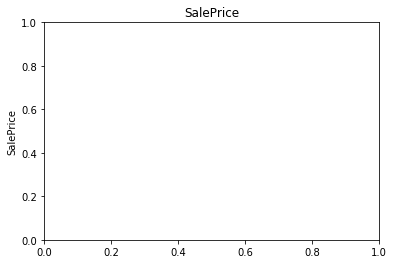

In [24]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data.boxplot(column=feature)
        plt.ylabel(feature)
        #plt.ylabel('SalesPrice')
        plt.title(feature)

Now we go for categorical features

In [25]:
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features


['MS Zoning',
 'Street',
 'Lot Config',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Kitchen Qual',
 'Functional',
 'Pool QC',
 'Sale Condition']

In [26]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MS Zoning  are 7
Distinct categories for Street  are 2
Distinct categories for Lot Config  are 5
Distinct categories for Bldg Type  are 5
Distinct categories for House Style  are 8
Distinct categories for Roof Style  are 6
Distinct categories for Exterior 1st  are 16
Distinct categories for Kitchen Qual  are 5
Distinct categories for Functional  are 8
Distinct categories for Pool QC  are 5
Distinct categories for Sale Condition  are 6


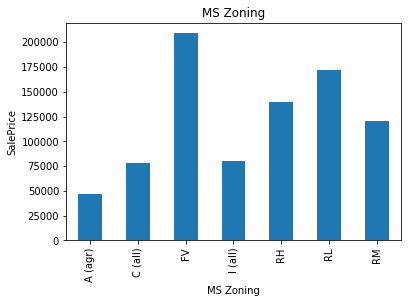

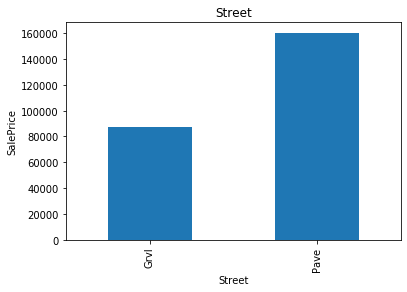

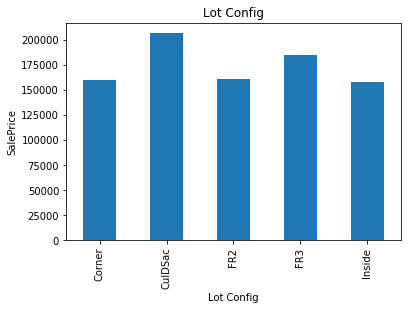

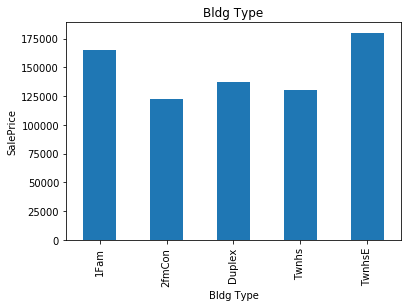

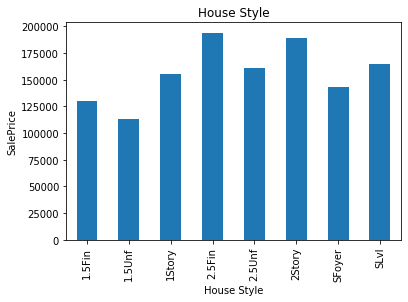

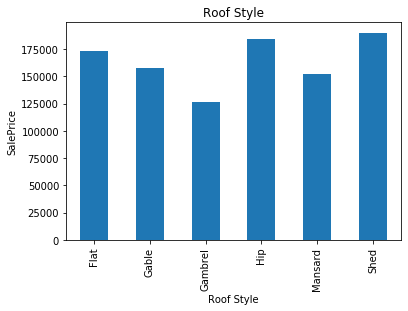

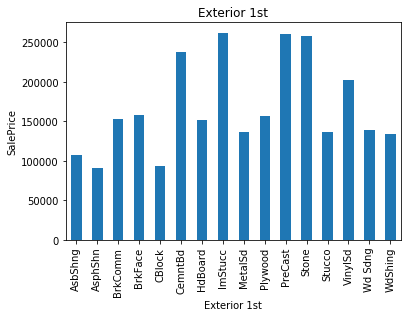

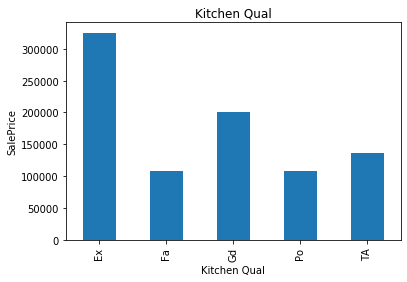

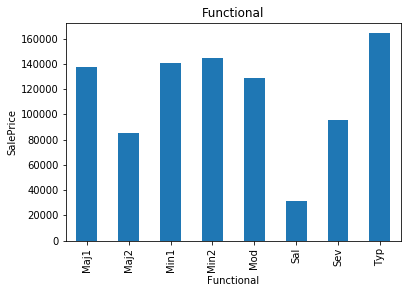

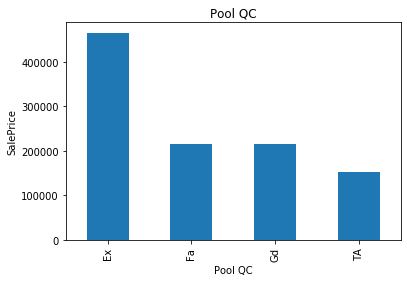

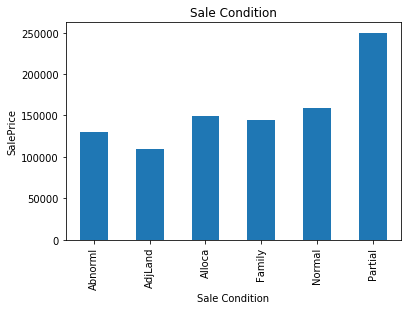

In [27]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [28]:
df_test.shape

NameError: name 'df_test' is not defined

In [29]:
df.shape

(2930, 21)

#### We see that there are 79 features 

In [30]:
# Checking the null values
df.isnull().sum()

MS Zoning            0
Lot Area             0
Street               0
Lot Config           0
Bldg Type            0
House Style          0
Overall Cond         0
Year Built           0
Roof Style           0
Exterior 1st         0
Full Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
Functional           0
Garage Cars          1
Garage Area          1
Pool Area            0
Pool QC           2917
Sale Condition       0
SalePrice            0
dtype: int64

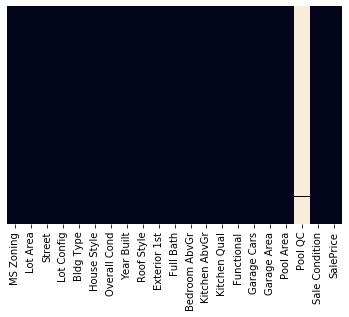

In [31]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
MS Zoning         2930 non-null object
Lot Area          2930 non-null int64
Street            2930 non-null object
Lot Config        2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Roof Style        2930 non-null object
Exterior 1st      2930 non-null object
Full Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Kitchen AbvGr     2930 non-null int64
Kitchen Qual      2930 non-null object
Functional        2930 non-null object
Garage Cars       2929 non-null float64
Garage Area       2929 non-null float64
Pool Area         2930 non-null int64
Pool QC           13 non-null object
Sale Condition    2930 non-null object
SalePrice         2930 non-null int64
dtypes: float64(2), int64(8), object(11)
memory usage: 480.8+ KB


## 3. Data cleaning

###         3.1 Missing value handling

Filling the missing value we need to see the test and train data simultaneously.     
We will be replacing the null values with mode for categorical values, discrete numerical values and year variables  
We will be replacing the null values with mean for continous numerical values.    
We will delete columns with more than 50% null values as the available information add no value for our model.    

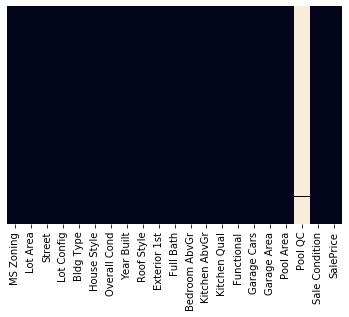

In [33]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [34]:
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
   # df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test                               

In [35]:
for feature in discrete_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    #df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test   

In [36]:
for feature in year_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    #df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test  #

In [37]:
# as sales price is absent in test data so we want to remove it from the feature list
continous_numerical_features = [feature for feature in continous_features if feature not in 'SalePrice']



In [38]:
for feature in continous_numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())                 #train
    #df_test[feature] = df_test[feature].fillna(df_test[feature].mean())  #test  

In [39]:
for feature in more_than_50_percent_misssing_value_features:
    df.drop([feature],axis = 1, inplace = True)
   # df_test.drop([feature],axis = 1, inplace = True)
    

##### We will also drop the id column as it is not useful for prediction

In [40]:
df.drop(['Id'],axis = 1, inplace = True)
#df_test.drop(['Id'],axis = 1, inplace = True)

KeyError: "['Id'] not found in axis"

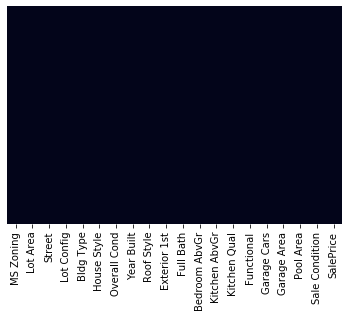

In [41]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [42]:
df.shape

(2930, 20)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
MS Zoning         2930 non-null object
Lot Area          2930 non-null int64
Street            2930 non-null object
Lot Config        2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Roof Style        2930 non-null object
Exterior 1st      2930 non-null object
Full Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Kitchen AbvGr     2930 non-null int64
Kitchen Qual      2930 non-null object
Functional        2930 non-null object
Garage Cars       2930 non-null float64
Garage Area       2930 non-null float64
Pool Area         2930 non-null int64
Sale Condition    2930 non-null object
SalePrice         2930 non-null int64
dtypes: float64(2), int64(8), object(10)
memory usage: 457.9+ KB


In [44]:
df.shape

(2930, 20)

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(2930, 20)

In [47]:
#df_test.shape


## 4. Feature Engineering

### 4.1 Handling rare categorical features
There may be some features that are less than 1% in the feature, we can remove them as they are not adding any value to the relationship between the feature and the SalePrice

In [48]:
# replacing rare variables with "Rare_v" for train 
'''
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count() / len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') # for test
    df_test[feature] = np.where (df_test[feature].isin(temp_df), df_test[feature],'Rare_var') # for test
'''   

"\nfor feature in categorical_features:\n    temp = df.groupby(feature)['SalePrice'].count() / len(df)\n    temp_df = temp[temp > 0.01].index\n    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') # for test\n    df_test[feature] = np.where (df_test[feature].isin(temp_df), df_test[feature],'Rare_var') # for test\n"

### 4.2 Data Transformation by one Hot Encoding of categorical variables

In [49]:
columns =[feature for feature in df.columns if df[feature].dtypes == 'O']
len(columns)

10

#### Converting categorical variables to one hot encoding

In [50]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [51]:
# making a copy of dataframe for future use
main_df=df.copy()

In [52]:
# concanating the test and train files to implement one hot encoding
#final_df=pd.concat([df,df_test],axis=0)

In [53]:
df.shape

(2930, 20)

In [54]:
#final_df=category_onehot_multcols(columns)

In [55]:
#final_df.shape

In [56]:
# removing duplicated columns
#final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [57]:
#final_df.shape

In [58]:
# separating the test and training data
#df_Train=final_df.iloc[:1460,:]
#df_Test=final_df.iloc[1460:,:]

In [59]:
#df_Train.shape

In [60]:
3df_Test.shape

SyntaxError: invalid syntax (<ipython-input-60-6e4b93996ac8>, line 1)

In [61]:
# dropping the "SalePrice" column from test data
#df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [62]:
# preparing data for feeding into model
#X_train=df_Train.drop(['SalePrice'],axis=1)
#y_train=df_Train['SalePrice']

In [63]:
# preparing data for feeding into model
#X_test=df_Test


In [64]:
X_train.head()

,MS Zoning,Lot Area,Street,Lot Config,Bldg Type,House Style,Overall Cond,Year Built,Roof Style,Exterior 1st,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Cars,Garage Area,Pool Area,Pool QC,Sale Condition
2073,RL,10029,Pave,Corner,1Fam,2Story,5,1988,Gable,Plywood,2,4,1,TA,Typ,2.0,521.0,0,NaN,Normal
2754,RL,11210,Pave,Inside,1Fam,1Story,5,2005,Gable,VinylSd,2,3,1,Gd,Typ,3.0,865.0,0,NaN,Partial
1282,RL,7590,Pave,Inside,1Fam,1Story,5,1963,Gable,Wd Sdng,1,3,1,TA,Typ,1.0,264.0,0,NaN,Normal
1572,RL,15498,Pave,Corner,1Fam,1Story,6,1976,Hip,Stone,2,2,1,Gd,Typ,2.0,665.0,0,NaN,Abnorml
641,RL,9482,Pave,Inside,Duplex,1Story,4,1958,Hip,Wd Sdng,2,4,2,TA,Typ,2.0,495.0,0,NaN,Normal


In [65]:
#X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

In [66]:
#X_train['GarageYrBlt']

## 5. Base Model implementation and evaluating it's RMSE

In [67]:
# implementing XGBoost regressor
#import xgboost
#classifier=xgboost.XGBRegressor()
#classifier.fit(X_train,y_train)

In [68]:
#import pickle
#filename = "finalazied_model.plk"
#pickle.dump(classifier,open(filename,'wb'))

In [69]:
#df_Test['GarageYrBlt'] = pd.to_numeric(df_Test['GarageYrBlt'])

In [70]:
df_Test['GarageYrBlt'][1]


NameError: name 'df_Test' is not defined

In [71]:
# predicting the house prices
#y_predict = classifier.predict(df_Test)

In [72]:
# displaying the house price
#y_predict

In [73]:
##Creating Sample Submission file
3pred=pd.DataFrame(y_predict)
#sub_df=pd.read_csv('sample_submission.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#sub_df['SalePrice'] = pred
#datasets.columns=['Id','SalePrice']
#sub_df.to_csv('sub1.csv',index=False)

SyntaxError: invalid syntax (<ipython-input-73-e699bdf1d727>, line 2)

In [74]:
#sub_df

#### Base Mode Results

 Got an RMSE score of 0.14065  on kaggle leaderboard
 Got an RMSE score of 0.14400  on kaggle leaderboard(second time)
 0.14106

## 6. Hyper parameter tuning

In [75]:

#regressor=xgboost.XGBRegressor()
#booster=['gbtree','gblinear']
#base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

#n_estimators = [100, 500, 900, 1100, 1500]
#max_depth = [2, 3, 5, 10, 15]

#learning_rate=[0.05,0.1,0.15,0.20]
#min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
#hyperparameter_grid = {
 #   'n_estimators': n_estimators,
  #  'max_depth':max_depth,
   # 'learning_rate':learning_rate,
    #'min_child_weight':min_child_weight,
    #'booster':booster,
   # 'base_score':base_score
    #}


In [76]:
# Set up the random search with 4-fold cross validation
#from sklearn.model_selection import RandomizedSearchCV

#regressor = xgboost.XGBRegressor()
#random_cv = RandomizedSearchCV(estimator=regressor,
 #           param_distributions=hyperparameter_grid,
  #          cv=5, n_iter=50,
   #         scoring = 'neg_mean_absolute_error',n_jobs = 4,
    #        verbose = 5, 
     #       return_train_score = True,
      #      random_state=42)

In [77]:

random_cv.fit(X_train,y_train)

NameError: name 'random_cv' is not defined

In [78]:
# finding the best estimate
#random_cv.best_estimator_

Using the above results we tune our regerssor for better performance

In [79]:
# substituting the best parameters
#regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
            # colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             #importance_type='gain', interaction_constraints='',
        #     learning_rate=0.1, max_delta_step=0, max_depth=2,
         #    min_child_weight=1, missing=None, monotone_constraints='()',
          #   n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
           #  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
            # tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#regressor.fit(X_train,y_train)

In [81]:
#3=#y_predict1 = regressor.predict(df_Test)

In [82]:
#y_predict1

In [83]:
##Create Sample Submission file and Submit using ANN
#pred=pd.DataFrame(y_predict1)
#sub_df=pd.read_csv('sample_submission.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#datasets.columns=['Id','SalePrice']
#datasets.to_csv('housepricetuned.csv',index=False)
#sub_df['SalePrice'] = pred
#datasets.columns=['Id','SalePrice']
#sub_df.to_csv('sub2.csv',index=False)

##### Got an RMSE score of 0.13728 on kaggle leaderboard  
0.13455 in second attempt

## Result

We got a slight improvement with hyperparameter tuning (from 0.14400 to 0.13455). Needs more tuning!


## 7. Attempt to improve the score

We can use the result to again train our XGBoost model as follows:  
1. We will concatenate the resultant SalePrice with the test data.
2. We will combine the test and train data to train our model 


In [84]:
#pred

In [85]:
#pred.columns = ['SalePrice']

In [86]:
#pred

In [87]:
#df_Train.shape

In [88]:
#df_Test.shape

In [89]:
#test_new = pd.concat([df_Test,pred],axis = 1)

#test_new


In [90]:
#train_new = pd.concat([df_Train,test_new],axis =0)
#train_new.shape 


In [91]:
#X_train=train_new.drop(['SalePrice'],axis=1)
#y_train=train_new['SalePrice']

In [92]:

#random_cv.fit(X_train,y_train)

In [93]:
# finding the best estimate
#random_cv.best_estimator_

In [94]:
# substituting the best parameters
#regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
 #            colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
  #           importance_type='gain', interaction_constraints='',
   #          learning_rate=0.1, max_delta_step=0, max_depth=2,
    #         min_child_weight=1, missing=None, monotone_constraints='()',
     #        n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
      #       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       #      tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
#regressor.fit(X_train,y_train)

In [96]:
#y_predict2 = regressor.predict(df_Test)

In [97]:
##Create Sample Submission file and Submit using ANN
#pred=pd.DataFrame(y_predict2)
#sub_df=pd.read_csv('sample_submission.csv')
#sub_df['SalePrice'] = pred
#sub_df.to_csv('sub3.csv',index=False)

 #### Scored an RMSE of 0.13439 !!! Improved

In [98]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Lot Area,Overall Cond,Year Built,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Garage Cars,Garage Area,Pool Area,SalePrice
0,31770,5,1960,1,3,1,2.0,528.0,0,215000
1,11622,6,1961,1,2,1,1.0,730.0,0,105000
2,14267,6,1958,1,3,1,1.0,312.0,0,172000
3,11160,5,1968,2,3,1,2.0,522.0,0,244000
4,13830,5,1997,2,3,1,2.0,482.0,0,189900


In [99]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with SalePrice:
Garage Cars    0.647812
Garage Area    0.640385
Year Built     0.558426
Full Bath      0.545604
Name: SalePrice, dtype: float64


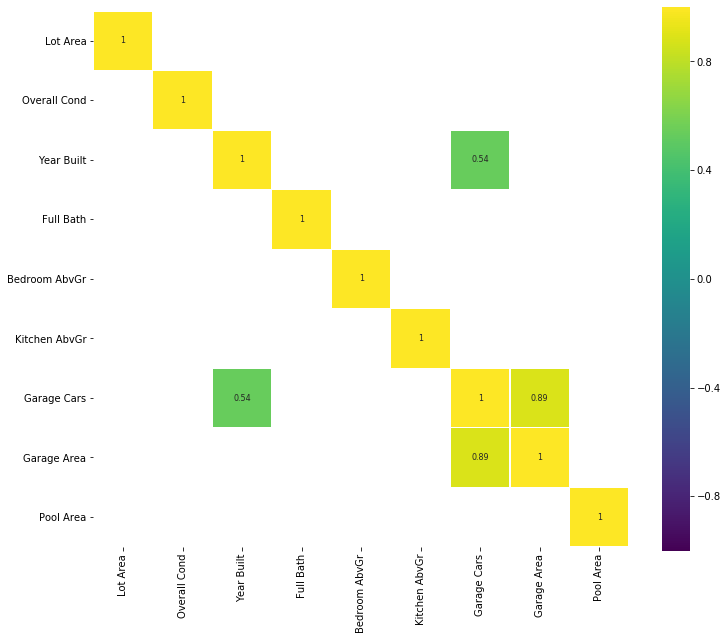

In [100]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
en = LabelEncoder()

In [102]:
col = ['MS Zoning','Street','Lot Config','Land Slope','Bldg Type','House Style','Roof Style','Exterior 1st','Kitchen Qual','Functional','Garage Cond','Sale Condition']

for i in col:
    df[i] = en.fit_transform(df[i])
    print('\n',i,'\n',df[i].head())


 MS Zoning 
 0    5
1    4
2    5
3    5
4    5
Name: MS Zoning, dtype: int32

 Street 
 0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int32

 Lot Config 
 0    0
1    4
2    0
3    0
4    4
Name: Lot Config, dtype: int32


KeyError: 'Land Slope'

In [103]:
from sklearn.model_selection import train_test_split

predictors = df_num.drop("SalePrice",axis=1)
target = df_num["SalePrice"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [104]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
X_train = np.nan_to_num(X_train)
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [105]:
Y_pred_lr.shape

(586,)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100*2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 3.0 %


In [108]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [109]:
prediction2=regressor.predict(X_test)
np.mean(np.absolute(prediction2-Y_test))

35876.81683731513

In [110]:
print('Variance score: %.2f' % regressor.score(X_test, Y_test))

Variance score: 0.53


In [111]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [112]:
prediction3=regr.predict(X_test)
np.mean(np.absolute(prediction3-Y_test))

25356.156992259253

In [113]:
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Variance score: 0.76


In [114]:
x=df["SalePrice"].unique()
print(x)

[215000 105000 172000 ...  90500  71000 150900]
